In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [61]:
df,d = pd.read_html("https://www.worldometers.info/coronavirus/")
df

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop
0,China,81054,+46,3261.0,6.0,72440.0,5353,1845.0,56.00
1,Italy,59138,"+5,560",5476.0,651.0,7024.0,46638,3000.0,978.00
2,USA,38167,"+13,960",396.0,94.0,178.0,37593,708.0,115.00
3,Spain,28603,"+3,107",1756.0,375.0,2125.0,24722,1785.0,612.00
4,Germany,24806,"+2,442",93.0,9.0,266.0,24447,2.0,296.00
...,...,...,...,...,...,...,...,...,...
186,Sint Maarten,1,NaN,NaN,NaN,NaN,1,NaN,23.00
187,Somalia,1,NaN,NaN,NaN,NaN,1,NaN,0.06
188,Timor-Leste,1,NaN,NaN,NaN,NaN,1,NaN,0.80
189,Uganda,1,NaN,NaN,NaN,NaN,1,NaN,0.02


In [62]:
copy=df.copy()

In [63]:
# df.fillna(value=0,inplace=True)

In [64]:
df.isnull().sum()

Country,Other         0
TotalCases            0
NewCases             82
TotalDeaths          98
NewDeaths           152
TotalRecovered       84
ActiveCases           0
Serious,Critical    115
Tot Cases/1M pop      1
dtype: int64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 9 columns):
Country,Other       191 non-null object
TotalCases          191 non-null int64
NewCases            109 non-null object
TotalDeaths         93 non-null float64
NewDeaths           39 non-null float64
TotalRecovered      107 non-null float64
ActiveCases         191 non-null int64
Serious,Critical    76 non-null float64
Tot Cases/1M pop    190 non-null float64
dtypes: float64(5), int64(2), object(2)
memory usage: 13.6+ KB


In [66]:
df["NewCases"]=df["NewCases"].str[1:]
df["NewCases"].head()

0        46
1     5,560
2    13,960
3     3,107
4     2,442
Name: NewCases, dtype: object

In [67]:
def remove(x):
    a=","
    if (isinstance (x,str)==True):
        if a in x:
            x=x.split(a)
            b=x[0]
            c=x[1]
            x=b+c
            return int(x)
        elif(x==" "):
            return(0)
        else:
            return(int(x))
    else:
        return (x)
#     x=str(x).split(",")
#     a=str(x[0])
#     b=str(x[1])
#     x=a+b
#     return int(x)

In [68]:
df['NewCases']=df['NewCases'].apply(remove)
df['NewCases'].head()

0       46.0
1     5560.0
2    13960.0
3     3107.0
4     2442.0
Name: NewCases, dtype: float64

In [69]:
df.to_csv("corona.csv")

In [70]:
corona=pd.read_csv('corona.csv')
corona.head()

,Unnamed: 0,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop
0,0,China,81054,46.0,3261.0,6.0,72440.0,5353,1845.0,56.0
1,1,Italy,59138,5560.0,5476.0,651.0,7024.0,46638,3000.0,978.0
2,2,USA,38167,13960.0,396.0,94.0,178.0,37593,708.0,115.0
3,3,Spain,28603,3107.0,1756.0,375.0,2125.0,24722,1785.0,612.0
4,4,Germany,24806,2442.0,93.0,9.0,266.0,24447,2.0,296.0


In [71]:
print(corona.columns)
df=corona

Index(['Unnamed: 0', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths',
       'NewDeaths', 'TotalRecovered', 'ActiveCases', 'Serious,Critical',
       'Tot Cases/1M pop'],
      dtype='object')


In [72]:
dff=df.iloc[0:-1,1:]
dff

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop
0,China,81054,46.0,3261.0,6.0,72440.0,5353,1845.0,56.00
1,Italy,59138,5560.0,5476.0,651.0,7024.0,46638,3000.0,978.00
2,USA,38167,13960.0,396.0,94.0,178.0,37593,708.0,115.00
3,Spain,28603,3107.0,1756.0,375.0,2125.0,24722,1785.0,612.00
4,Germany,24806,2442.0,93.0,9.0,266.0,24447,2.0,296.00
...,...,...,...,...,...,...,...,...,...
185,St. Vincent Grenadines,1,NaN,NaN,NaN,NaN,1,NaN,9.00
186,Sint Maarten,1,NaN,NaN,NaN,NaN,1,NaN,23.00
187,Somalia,1,NaN,NaN,NaN,NaN,1,NaN,0.06
188,Timor-Leste,1,NaN,NaN,NaN,NaN,1,NaN,0.80


In [73]:
#Percentage of missing values
round((dff.isnull().sum()/len(dff))*100,1)

Country,Other        0.0
TotalCases           0.0
NewCases            43.2
TotalDeaths         51.6
NewDeaths           80.0
TotalRecovered      44.2
ActiveCases          0.0
Serious,Critical    60.5
Tot Cases/1M pop     0.5
dtype: float64

In [74]:
catcols=list(dff.select_dtypes(include=['object']).columns)
print("Categorical columns: ",catcols)

Categorical columns:  ['Country,Other']


In [75]:
numcols=list(dff.select_dtypes(exclude=['object']).columns)
print("Continuous columns: \n",numcols)

Continuous columns: 
 ['TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'ActiveCases', 'Serious,Critical', 'Tot\xa0Cases/1M pop']


In [76]:
# Those are null values not missing values, lets impute with 0

#### Data Imputation

In [77]:
dff.fillna(0,inplace=True)
dff.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop
0,China,81054,46.0,3261.0,6.0,72440.0,5353,1845.0,56.0
1,Italy,59138,5560.0,5476.0,651.0,7024.0,46638,3000.0,978.0
2,USA,38167,13960.0,396.0,94.0,178.0,37593,708.0,115.0
3,Spain,28603,3107.0,1756.0,375.0,2125.0,24722,1785.0,612.0
4,Germany,24806,2442.0,93.0,9.0,266.0,24447,2.0,296.0


In [78]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 9 columns):
Country,Other       190 non-null object
TotalCases          190 non-null int64
NewCases            190 non-null float64
TotalDeaths         190 non-null float64
NewDeaths           190 non-null float64
TotalRecovered      190 non-null float64
ActiveCases         190 non-null int64
Serious,Critical    190 non-null float64
Tot Cases/1M pop    190 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 13.5+ KB


In [79]:
print("Percentage of missing values: ")
round((dff.isnull().sum()/len(dff))*100,1)

Percentage of missing values: 


Country,Other       0.0
TotalCases          0.0
NewCases            0.0
TotalDeaths         0.0
NewDeaths           0.0
TotalRecovered      0.0
ActiveCases         0.0
Serious,Critical    0.0
Tot Cases/1M pop    0.0
dtype: float64

In [80]:
dff.rename(columns={"Country,Other":"Country"},inplace=True)
dff.head()

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop
0,China,81054,46.0,3261.0,6.0,72440.0,5353,1845.0,56.0
1,Italy,59138,5560.0,5476.0,651.0,7024.0,46638,3000.0,978.0
2,USA,38167,13960.0,396.0,94.0,178.0,37593,708.0,115.0
3,Spain,28603,3107.0,1756.0,375.0,2125.0,24722,1785.0,612.0
4,Germany,24806,2442.0,93.0,9.0,266.0,24447,2.0,296.0


In [81]:
dff.describe().T

,count,mean,std,min,25%,50%,75%,max
TotalCases,190.0,1779.494737,8380.310393,1.0,6.0,57.5,323.75,81054.0
NewCases,190.0,174.284211,1124.058211,0.0,0.0,3.0,31.00,13960.0
TotalDeaths,190.0,76.084211,493.720958,0.0,0.0,0.0,3.00,5476.0
NewDeaths,190.0,7.626316,55.578938,0.0,0.0,0.0,0.00,651.0
TotalRecovered,190.0,510.305263,5306.418802,0.0,0.0,1.0,9.75,72440.0
ActiveCases,190.0,1193.105263,5164.145628,0.0,6.0,53.0,244.25,46638.0
"Serious,Critical",190.0,54.200000,309.516438,0.0,0.0,0.0,3.00,3000.0
Tot Cases/1M pop,190.0,136.449947,469.210124,0.0,2.0,14.0,64.25,5158.0


In [82]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
from plotly.offline import iplot
# cufflinks.go_offline(connected=True)
# init_notebook_mode(connected=True)

In [83]:
### Top 5 cities with total no. of cases

In [84]:
dff.sort_values(by=['TotalCases'],ascending=False,axis=0,inplace=True)
d=dff.head()
d

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop
0,China,81054,46.0,3261.0,6.0,72440.0,5353,1845.0,56.0
1,Italy,59138,5560.0,5476.0,651.0,7024.0,46638,3000.0,978.0
2,USA,38167,13960.0,396.0,94.0,178.0,37593,708.0,115.0
3,Spain,28603,3107.0,1756.0,375.0,2125.0,24722,1785.0,612.0
4,Germany,24806,2442.0,93.0,9.0,266.0,24447,2.0,296.0


In [85]:
import plotly.graph_objects as go

colors = ['lightslategray',] * 5
colors[1] = 'crimson'

fig = go.Figure()
fig.add_trace(go.Bar(
    x=d["Country"],
    y=d.TotalDeaths,
    
    marker_color=colors,
    text=df.TotalDeaths,
    textposition='auto'
))
fig.update_layout(title_text='Top 5 Countries having Total no. of Deaths')
fig.show()

In [46]:
import matplotlib.patches as patches

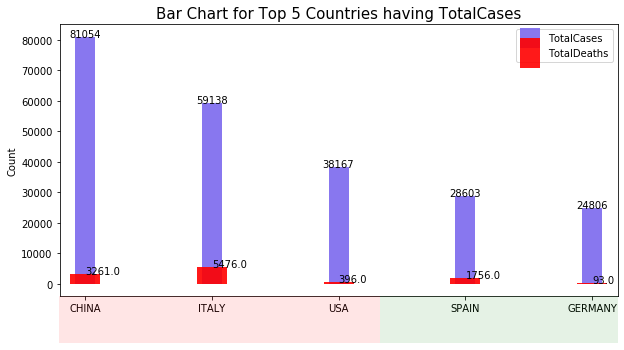

In [107]:
fig, ax = plt.subplots(figsize=(10,5), facecolor='white')
ax.vlines(x=d['Country'], ymin=0, ymax=d['TotalCases'], color='#7B68EE', alpha=0.9, linewidth=20,label='TotalCases')
ax.vlines(x=d['Country'], ymin=0, ymax=d['TotalDeaths'], color='#FF0000', alpha=0.9, linewidth=20+10,label='TotalDeaths')

# Annotate Text
for i, cty in enumerate(d['TotalCases']):
    ax.text(i, int(cty)+0.1, round(cty, 1), horizontalalignment='center')
for i, cty in enumerate(d['TotalDeaths']):
    ax.text(i, int(cty)+0.1, round(cty, 1), horizontalalignment='left')



# Title, Label, Ticks and Ylim
ax.set_title('Bar Chart for Top 5 Countries having TotalCases', fontdict={'size':15})
ax.set(ylabel='Count')
plt.xticks(d['Country'], d['Country'].str.upper(), rotation=0, horizontalalignment='center', fontsize=10)

# Add patches to color the X axis labels
p1 = patches.Rectangle((.57, -0.005), width=.33, height=.13, alpha=.1, facecolor='green', transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
plt.legend()
plt.show()

In [108]:
### Top 10 Cities suffering with Corona Virus severely

                1
Italy        5476
China        3261
Spain        1756
Iran         1685
France        562
USA           396
UK            281
Netherlands   179
S. Korea      104


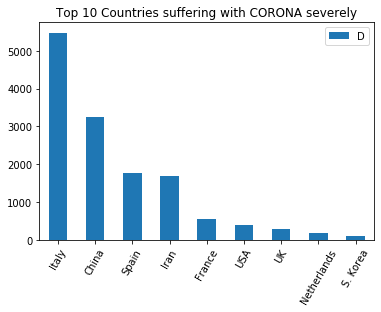

In [109]:
stdeaths=dff.sort_values(by=["TotalDeaths"],axis=0,ascending=False)
d=stdeaths[['Country','TotalDeaths']].values[0:9]
d=pd.DataFrame(d)
d=d.rename({'1':'count'},axis=1)
d.set_index(0,inplace=True)
del d.index.name
d.plot.bar(rot=60)
plt.title('Top 10 Countries suffering with CORONA severely')
print(d)
plt.legend('Deaths')
plt.show()

In [110]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=dff["Country"][dff.TotalCases>1000],
    y=dff.TotalCases[dff.TotalCases>1000],
    name='TotalCases',
    marker_color='#FAA460',
    text=df.TotalCases[df.TotalCases>1000],
    textposition='auto'
))
fig.add_trace(go.Bar(
    x=dff["Country"][dff.TotalCases>1000],
    y=dff["TotalRecovered"][dff.TotalCases>1000],
    name='TotalRecovered',
    marker_color='#2ca02c',
    text=dff.TotalRecovered[dff.TotalCases>1000],
    textposition='auto'
))

fig.add_trace(go.Bar(
    x=dff["Country"][dff.TotalCases>1000],
    y=dff.TotalDeaths[dff.TotalCases>1000],
    name='TotalDeaths',
    marker_color='#EF553B',
    text=dff.TotalDeaths[dff.TotalCases>1000],
    textposition='auto'
))
fig.update_layout(title_text='Corona virus TotalCase greater than 1000',xaxis_tickfont_size=14,
    yaxis=dict(
        title='COUNT',
        titlefont_size=16,
        tickfont_size=14))
fig.show()

In [111]:
d=dff[dff['TotalCases']<=100].Country.count()
print("The countries whose Total Cases are less than 100: \n")
print(list(dff[dff['TotalCases']<=100].Country))

The countries whose Total Cases are less than 100: 

['Cyprus', 'Bosnia and Herzegovina', 'Moldova', 'Malta', 'Albania', 'Brunei', 'Cambodia', 'Sri Lanka', 'Belarus', 'Burkina Faso', 'Tunisia', 'Venezuela', 'New Zealand', 'Azerbaijan', 'Kazakhstan', 'Palestine', 'Senegal', 'Guadeloupe', 'Oman', 'Georgia', 'Trinidad and Tobago', 'Ukraine', 'Réunion', 'Uzbekistan', 'Cameroon', 'Martinique', 'Liechtenstein', 'Cuba', 'Afghanistan', 'Channel Islands', 'Nigeria', 'DRC', 'Bangladesh', 'Guam', 'Honduras', 'Mauritius', 'Bolivia', 'Puerto Rico', 'Paraguay', 'Macao', 'Ghana', 'Jamaica', 'French Guiana', 'Guyana', 'Monaco', 'Guatemala', 'Rwanda', 'Montenegro', 'Togo', 'French Polynesia', 'Gibraltar', 'Kenya', 'Barbados', 'Ivory Coast', 'Kyrgyzstan', 'Maldives', 'Tanzania', 'Ethiopia', 'Mayotte', 'Mongolia', 'Aruba', 'Seychelles', 'Equatorial Guinea', 'U.S. Virgin Islands', 'Saint Martin', 'Suriname', 'Gabon', 'Isle of Man', 'New Caledonia', 'Eswatini', 'Bahamas', 'Liberia', 'Zimbabwe', 'Zambia', '

In [112]:
dff[dff['Country']=='India']

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop
42,India,396,64.0,7.0,2.0,24.0,365,0.0,0.3


#### Countries Ranks in their Deaths

In [113]:
dff['Rank_Deaths']=dff["TotalDeaths"].rank(ascending=False,method='dense',axis=0)
dff.head()

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Rank_Deaths
0,China,81054,46.0,3261.0,6.0,72440.0,5353,1845.0,56.0,2.0
1,Italy,59138,5560.0,5476.0,651.0,7024.0,46638,3000.0,978.0,1.0
2,USA,38167,13960.0,396.0,94.0,178.0,37593,708.0,115.0,6.0
3,Spain,28603,3107.0,1756.0,375.0,2125.0,24722,1785.0,612.0,3.0
4,Germany,24806,2442.0,93.0,9.0,266.0,24447,2.0,296.0,11.0


In [114]:
f=dff[dff['Country']=='India'].Rank_Deaths
print("The rank of INDIA in their Death Cases %d out of %d" %(f,dff['Rank_Deaths'].max()))


The rank of INDIA in their Death Cases 26 out of 33


In [118]:
print('The countries whose death rate is low: ')
print()
g=dff["Country"][dff["Rank_Deaths"]==26]
print(list(g.unique()))

The countries whose death rate is low: 

['Norway', 'Australia', 'Poland', 'India']


In [117]:
fig = go.Figure()
fig.add_trace(go.Choropleth(
        locationmode = 'country names',
        locations = dff["Country"],
        z = dff.TotalCases,
        text = dff["Country"],
        colorscale='sunset',
        autocolorscale = False,
        showscale = True,
        geo = 'geo'
    ))
fig.update_layout(title_text='Corona virus affected countries')

In [59]:
fig = go.Figure()
fig.add_trace(go.Choropleth(
        locationmode = 'country names',
        locations = dff["Country"],
        z = dff.TotalDeaths,
        text = dff["Country"],
        colorscale='sunset',
        autocolorscale = False,
        showscale = True,
        geo = 'geo'
    ))
fig.update_layout(title_text='Corona virus affected countries')